# Impact of various events on market efficiencies in Indian Stock market

In this notebook, we'll analyse how various events in stock exchange have impacted the efficiencies in the Indian Stock market

1. Load data
2. Describe events and break it down
3. Perform various test of randomness on each section of the data

In [228]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import entropy, ttest_ind
import seaborn as sns


## Data along with descriptive statistics

The tick by tick was analysed for the periods from 1999-2017. 

## Events

### Market events

1. CTCL - Computer to Computer link - in year 2000 - https://www.nseindia.com/content/circulars/cmtr1641.htm - May 12 2000
2. CTCL for Trading - https://www.nseindia.com/content/circulars/cmtr3896.htm - Jan 28 2003
3. DMA facility - April 3rd 2008, Securities & Exchange Board of India (SEBI), started allowing Direct Market Access facility which allows buying or selling of orders by institutional clients without manual intervention by brokers.
4. Colocation Facility - https://www.nseindia.com/content/circulars/memb12985.zip - August 31, 2009
5. Tick by Tick - December 03, 2009 IP Connectivity for Category T (Tick by Tick) (zip) - before this time, all data was provided at the fastest rate of 1 update per second. 
6. March 10, 2014 Tick by Tick (TBT) market data over Multicast (pdf)

In [80]:
events = ['1999-01-01','2000-05-12','2003-01-28','2008-04-03','2009-08-31','2009-12-03','2014-03-10','2017-03-01']

In [101]:
df_by_events ={}
descriptive_stats = {}
for i in range(len(events)-1):
    descriptive_stats[i] = {}
    df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]
    #print("Average number of trades in period", events[i],"to",events[i+1],":",df_by_events[events[i]].N.mean())
    descriptive_stats[i]['number_of_days'] = df_by_events[events[i]].N.count()
    descriptive_stats[i]['total_trades'] = df_by_events[events[i]].N.sum()
    descriptive_stats[i]['avg_no_of_trades'] = df_by_events[events[i]].N.mean()

descriptive_stats = pd.DataFrame(descriptive_stats).T

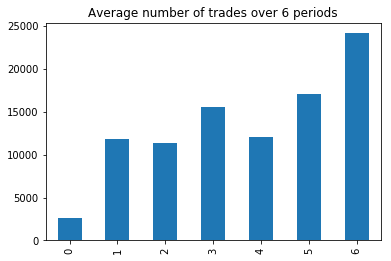

In [169]:
descriptive_stats.avg_no_of_trades.plot(kind='bar',title='Average number of trades over 6 periods')

## Conditional probalities and student t-test


In [182]:
probability_list = ['P(-)','P(-|-)','P(-|--)','P(-|---)','P(-|----)','P(-|----)']

In [192]:
#df_by_events[events[0]][probability_list]

In [211]:
conditional_prob_mean =[0]* (len(events)-1)
prob_df = [0]* (len(events)-1)
for i in range(len(events)-1):
    #print
    Y = df_by_events[events[i]][probability_list].dropna()
    conditional_prob_mean[i] = Y.mean()
    prob_df[i] = Y['P(-|-)']

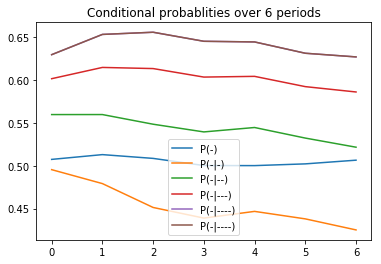

In [195]:
plt.plot(conditional_prob_mean)
plt.title('Conditional probablities over 6 periods')
plt.legend(probability_list)

### T-test matrix

t-stat(i,j) = T-statistics for significant difference in probablities('P(-|-)') between period i and j

In [223]:
#T-test matrix
ttest_stats = {}
ttest_pvalue = {}
for i in range(len(events)-1):
    ttest_stats[i] = {}
    ttest_pvalue[i] = {}
    for j in range(len(events)-1):
        ttest_stats[i][j], ttest_pvalue[i][j] = ttest_ind(prob_df[i],prob_df[j])
ttest_stats = pd.DataFrame(ttest_stats)
ttest_pvalue = pd.DataFrame(ttest_pvalue)


In [225]:
ttest_stats

,0,1,2,3,4,5,6
0,0.000000,-5.199872,-14.936676,-13.933026,-5.676509,-16.177496,-16.659269
1,5.199872,0.000000,-14.925197,-17.542716,-7.196766,-18.296011,-20.686776
2,14.936676,14.925197,0.000000,-5.044234,-0.856643,-6.536645,-10.682553
3,13.933026,17.542716,5.044234,0.000000,1.525376,-0.307350,-4.058066
4,5.676509,7.196766,0.856643,-1.525376,0.000000,-1.351850,-2.993090
5,16.177496,18.296011,6.536645,0.307350,1.351850,0.000000,-4.373586
6,16.659269,20.686776,10.682553,4.058066,2.993090,4.373586,0.000000


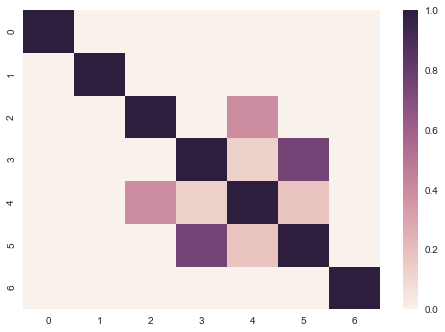

In [229]:
sns.heatmap(ttest_pvalue)

## Shanon Entropy test

In [196]:
shanon_entropy =[0]* (len(events)-1)
for i in range(len(events)-1):
    #print
    Y = df_by_events[events[i]][probability_list].dropna()
    shanon_entropy[i] = (-np.sum(Y*np.log2(Y)))/Y.shape[0]
    

In [206]:
#shanon_entropy[0].shape

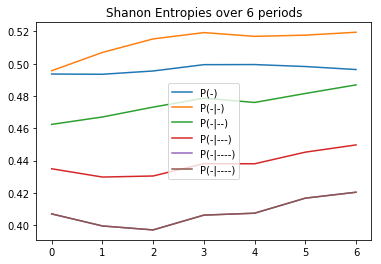

In [198]:
plt.plot(shanon_entropy)
plt.title('Shanon Entropies over 6 periods')
plt.legend(probability_list)

## VRatio-test

In [200]:
vratio =[0]* len(events)
for i in range(len(events)-1):
    print("Period:",i)
    Y = df_by_events[events[i]]['P(-|-)'].dropna()
    vratio[i] = LoMac(Y.values,[2,5,10])
    print(vratio[i])

Period: 0
            M1        M2        VR
k=2   0.844379  0.721265  1.046694
k=5   1.935939  1.882170  1.234552
k=10  2.612803  2.610905  1.487849
Period: 1
             M1         M2        VR
k=2    5.711704   5.354951  1.223345
k=5   10.698954  10.173445  1.916586
k=10  15.170749  14.402462  3.002952
Period: 2
             M1         M2        VR
k=2   16.873806  13.978836  1.497798
k=5   27.477683  23.578320  2.775991
k=10  37.848127  32.993534  4.769961
Period: 3
            M1        M2        VR
k=2   5.643229  5.529894  1.306498
k=5   7.360261  7.271858  1.875818
k=10  8.734206  8.777099  2.601681
Period: 4
            M1        M2        VR
k=2   1.601194  1.638031  1.205012
k=5   1.186928  1.229139  1.332951
k=10  0.756927  0.782657  1.327221
Period: 5
             M1         M2        VR
k=2    8.606398   7.598146  1.301284
k=5   13.248884  11.807751  2.016143
k=10  16.704483  15.225481  2.974424
Period: 6
             M1         M2        VR
k=2    5.896684   5.355940  1

In [ ]:
ls FromServer/output/output/

In [71]:
years = list(range(1999,2017))
timespans = ['tick','1s', '3s']#, '5s', '10s', '20s', '30s', '1T', '5T']#, '30T']

Columns = ['ts','N', 
           'P(-)','P(+)',
           'P(-|-)','P(+|-)','P(-|+)','P(+|+)',
           'P(-|--)','P(+|--)','P(-|-+)','P(+|-+)','P(-|+-)','P(+|+-)','P(-|++)','P(+|++)',
           'P(-|---)','P(+|---)','P(-|--+)','P(+|--+)','P(-|-+-)','P(+|-+-)','P(-|-++)','P(+|-++)','P(-|+--)','P(+|+--)','P(-|+-+)','P(+|+-+)','P(-|++-)','P(+|++-)','P(-|+++)','P(+|+++)',
           'P(-|----)','P(+|----)','P(-|---+)','P(+|---+)','P(-|--+-)','P(+|--+-)','P(-|--++)','P(+|--++)','P(-|-+--)','P(+|-+--)','P(-|-+-+)','P(+|-+-+)','P(-|-++-)','P(+|-++-)','P(-|-+++)','P(+|-+++)','P(-|+---)','P(+|+---)','P(-|+--+)','P(+|+--+)','P(-|+-+-)','P(+|+-+-)','P(-|+-++)','P(+|+-++)','P(-|++--)','P(+|++--)','P(-|++-+)','P(+|++-+)','P(-|+++-)','P(+|+++-)','P(-|++++)','P(+|++++)',
           ]
           
#a = pd.read_csv('output/1s1999output_prob.csv',names=Columns, header=0)

df_mean = pd.DataFrame(index=Columns, columns=years)
df_std = pd.DataFrame(index=Columns, columns=years)

df_all_timespans = {}
for timespan in timespans:
    dfX = pd.DataFrame(columns=Columns)
    for year in years:
        a = pd.read_csv('FromServer/output/output/'+str(timespan)+str(year)+'output_prob.csv',names=Columns, header=0)
        a.index = pd.to_datetime(a.ts.astype(str))
        dfX = dfX.append(a)
        df_mean[year] = a.mean()
        df_std[year] = a.std()
        #print (dfX.shape)
        b = pd.concat([df_mean,df_std],keys=['mean','std'])
    df_all_timespans[timespan] = dfX
    #b.to_excel('output_prob'+str(timespan)+'_combined.xlsx')


In [72]:
df = df_all_timespans['tick']

In [79]:
df[df.index <'2004-12-26']

,ts,N,P(-),P(+),P(-|-),P(+|-),P(-|+),P(+|+),P(-|--),P(+|--),...,P(-|+-++),P(+|+-++),P(-|++--),P(+|++--),P(-|++-+),P(+|++-+),P(-|+++-),P(+|+++-),P(-|++++),P(+|++++)
1999-01-04,19990104.0,274.0,0.514599,0.485401,0.531915,0.460993,0.496241,0.511278,0.560000,0.440000,...,0.272727,0.727273,0.692308,0.307692,0.647059,0.411765,0.368421,0.631579,0.526316,0.473684
1999-01-05,19990105.0,314.0,0.509554,0.490446,0.550000,0.456250,0.467532,0.525974,0.613636,0.386364,...,0.520000,0.480000,0.400000,0.600000,0.360000,0.640000,0.250000,0.812500,0.346154,0.653846
1999-01-06,19990106.0,416.0,0.519231,0.480769,0.564815,0.439815,0.470000,0.525000,0.655738,0.352459,...,0.423077,0.576923,0.473684,0.578947,0.448276,0.517241,0.320000,0.680000,0.468750,0.531250
1999-01-07,19990107.0,490.0,0.477551,0.522449,0.525641,0.470085,0.433594,0.570312,0.593496,0.406504,...,0.370370,0.629630,0.631579,0.368421,0.448276,0.551724,0.482759,0.517241,0.281690,0.732394
1999-01-08,19990108.0,365.0,0.408219,0.591781,0.429530,0.563758,0.393519,0.611111,0.515625,0.484375,...,0.324324,0.675676,0.333333,0.666667,0.272727,0.727273,0.387097,0.580645,0.346939,0.653061
1999-01-11,19990111.0,372.0,0.564516,0.435484,0.557143,0.442857,0.574074,0.425926,0.649573,0.350427,...,0.500000,0.550000,0.500000,0.500000,0.739130,0.260870,0.500000,0.500000,0.692308,0.307692
1999-01-12,19990112.0,306.0,0.349673,0.650327,0.429907,0.579439,0.306533,0.688442,0.521739,0.500000,...,0.227273,0.772727,0.400000,0.600000,0.333333,0.666667,0.260870,0.739130,0.192771,0.807229
1999-01-13,19990113.0,420.0,0.440476,0.559524,0.475676,0.524324,0.412766,0.587234,0.488636,0.522727,...,0.354839,0.645161,0.681818,0.363636,0.379310,0.620690,0.482759,0.517241,0.298246,0.701754
1999-01-14,19990114.0,1311.0,0.467582,0.532418,0.510604,0.489396,0.429799,0.570201,0.594249,0.408946,...,0.375000,0.625000,0.450980,0.549020,0.538462,0.461538,0.321429,0.678571,0.296512,0.703488
1999-01-15,19990115.0,1401.0,0.548180,0.451820,0.615885,0.382812,0.466035,0.535545,0.693446,0.306554,...,0.441176,0.558824,0.539683,0.460317,0.464789,0.549296,0.378378,0.621622,0.320611,0.679389


In [38]:
df[timespan] = df[timespan].append(a)

In [39]:
df[timespan]

,ts,N,P(-),P(+),P(-|-),P(+|-),P(-|+),P(+|+),P(-|--),P(+|--),...,P(-|+-++),P(+|+-++),P(-|++--),P(+|++--),P(-|++-+),P(+|++-+),P(-|+++-),P(+|+++-),P(-|++++),P(+|++++)


In [19]:
pd.to_datetime('20170405')

Timestamp('2017-04-05 00:00:00')

In [22]:
a.index = pd.to_datetime(a.ts.astype(str))

In [18]:
a.ts[1:2]

1    19990105
Name: ts, dtype: int64

In [8]:
b.T

mean                                                            \
                ts       N      P(-)      P(+)    P(-|-)    P(+|-)    P(-|+)   
1999  1.999067e+07  955.54  0.501514  0.498486  0.441298  0.559037  0.561863   

                                      ...          std                      \
        P(+|+)   P(-|--)   P(+|--)    ...    P(-|+-++) P(+|+-++) P(-|++--)   
1999  0.437864  0.469173  0.531903    ...     0.082707  0.084508  0.094491   

                                                                            
     P(+|++--) P(-|++-+) P(+|++-+) P(-|+++-) P(+|+++-) P(-|++++) P(+|++++)  
1999  0.087519  0.078212  0.077119  0.091229  0.089768  0.102202  0.096659  

[1 rows x 128 columns]

## Backup


### Vratiotest code from
https://github.com/hiemal/vratiotest/blob/master/vratiotest.py

In [110]:

"""@
Author: Z Hu, MIT
2016-02-19
Rewrite R's Lo.Mac funtion in vrtest package in Python.
"""

#Define functions for vratiotest


def LM_stat(y, k):
    y1 = (y - np.mean(y))**2
    n = len(y)
    m = np.mean(y)
    vr1 = np.sum((y-m)**2)/n
    
    # use the convolve function
    flt = np.convolve(y, np.repeat(1,k), mode = 'valid')
    summ = np.sum((flt-k*m)**2)
    
    vr2 = summ/(n*k)
    vr = vr2/vr1
    
    tem1 = 2*(2*k-1)*(k-1)
    tem2 = 3*k
    
    m1 = np.sqrt(n)*(vr-1)/np.sqrt(tem1/tem2)
    w = 4*(1-np.arange(1,k)/k)**2
    dvec = np.zeros([k-1,1])
    for j in range(k-1):
        dvec[j] = np.sum(y1[(j+1):(n+1)] * y1[0:(n-j-1)])/(np.sum(y1)**2)
    summ = np.sum(w* np.ravel(dvec))
    m2 = np.sqrt(n)*(vr-1)*((n*summ)**(-0.5))
    return (m1,m2,vr)
    
    

def LoMac(y, kvec):
    """
    The function returns M1 and M2 statistics of Lo and MacKinlay (1998).
    M1: tests for iid series; M2: for uncorrelated series with possible heteroskedasticity; VR: variance ratio.
    """
    n = len(y)
    mq = np.zeros([len(kvec),3])
    for i in range(len(kvec)):
        k = kvec[i]
        LM = LM_stat(y,k)
        mq[i] = np.array(LM)
    VR = pd.DataFrame(mq, columns = ["M1", "M2", "VR"], index = ['k='+str(k) for k in kvec])
    return VR

In [142]:
Y = df_by_events[events[0]]['P(-|-)'].dropna()

In [124]:
LM_stat(Y,200)

(nan, nan, nan)

In [134]:
LoMac(Y.values,[2,5,10])

,M1,M2,VR
k=2,0.844379,0.721265,1.046694
k=5,1.935939,1.882170,1.234552
k=10,2.612803,2.610905,1.487849


In [125]:
from scipy.stats import entropy

In [143]:
entropy(Y)

5.7798732965993764

In [129]:
Y.shape, Y.dropna().shape

((338,), (327,))

In [150]:
#Y= Y/Y.sum()
(-np.sum(Y*np.log2(Y)))/Y.shape[0]

0.49411629195374696

In [152]:
.5*np.log2(0.5)

-0.5

In [148]:
Y.shape

(327,)